In [3]:
import pandas as pds
import sklearn as skl
import seaborn as sns
import numpy as num

In [4]:
planetas = pds.read_csv("cumulative.csv")
planetas.replace('',num.nan,inplace = True)
planetas.dropna(inplace = True)

# Para demonstrarmos o funcionamento das diferentes funções de Kernel num SVM, vamos pegar um database não-trivial e tentar classifica-lo com o nosso modelo.

* Para isso, escolhemos o database da NASA: "Kepler Exoplanet Search Results"
* Nesse database, temos informações sobre diversos planetas detectados pelo telescópio Kepler, cujo foco é de encontrar exoplanetas (planetas que orbitam estrelas que não o Sol) pelo universo.


# Na coluna *kResult*, temos a situação do planeta ID:
* É um exoplaneta, portanto CONFIRMED.
* Não é um exoplaneta, portanto FALSE POSITIVE.
* Talvez seja um exoplaneta, portanto CANDIDATE.

# Vamos criar um modelo que classifique se um planeta é/pode ser um exoplaneta ou não.


In [17]:
planetas.head(20)

,ID,kID,kName,kResult,Not Transit-Like Flag,Stellar Eclipse Flag,Centroid Offset Flag,Ephemeris Match Indicates Contamination Flag,Orbital Period (days),Transit Epoch,Transit Duration (hours),Right Ascension,KIC Declination,Kepler-band
0,1,10797460,K00752.01,CONFIRMED,0,0,0,0,9.488036,170.538750,2.95750,291.93423,48.141651,15347.0
1,2,10797460,K00752.02,CONFIRMED,0,0,0,0,54.418383,162.513840,4.50700,291.93423,48.141651,15347.0
2,3,10811496,K00753.01,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,1.78220,297.00482,48.134129,15436.0
3,4,10848459,K00754.01,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,2.40641,285.53461,48.285210,15597.0
4,5,10854555,K00755.01,CONFIRMED,0,0,0,0,2.525592,171.595550,1.65450,288.75488,48.226200,15509.0
5,6,10872983,K00756.01,CONFIRMED,0,0,0,0,11.094321,171.201160,4.59450,296.28613,48.224670,15714.0
6,7,10872983,K00756.02,CONFIRMED,0,0,0,0,4.134435,172.979370,3.14020,296.28613,48.224670,15714.0
7,8,10872983,K00756.03,CONFIRMED,0,0,0,0,2.566589,179.554370,2.42900,296.28613,48.224670,15714.0
8,9,6721123,K00114.01,FALSE POSITIVE,0,1,1,0,7.361790,132.250530,5.02200,298.86435,42.151569,12660.0
9,10,10910878,K00757.01,CONFIRMED,0,0,0,0,16.068647,173.621937,3.53470,286.99948,48.375790,15841.0


# Percebemos claramente, nós gráficos em pares abaixo, que as amostras do nosso database não são nada triviais, e nem linearmente separáveis. Portanto, caso queiramos utilizar o SVM para classificar os dados, teremos que testar diferentes funções de Kernel e molda-las para uma melhor precisão.

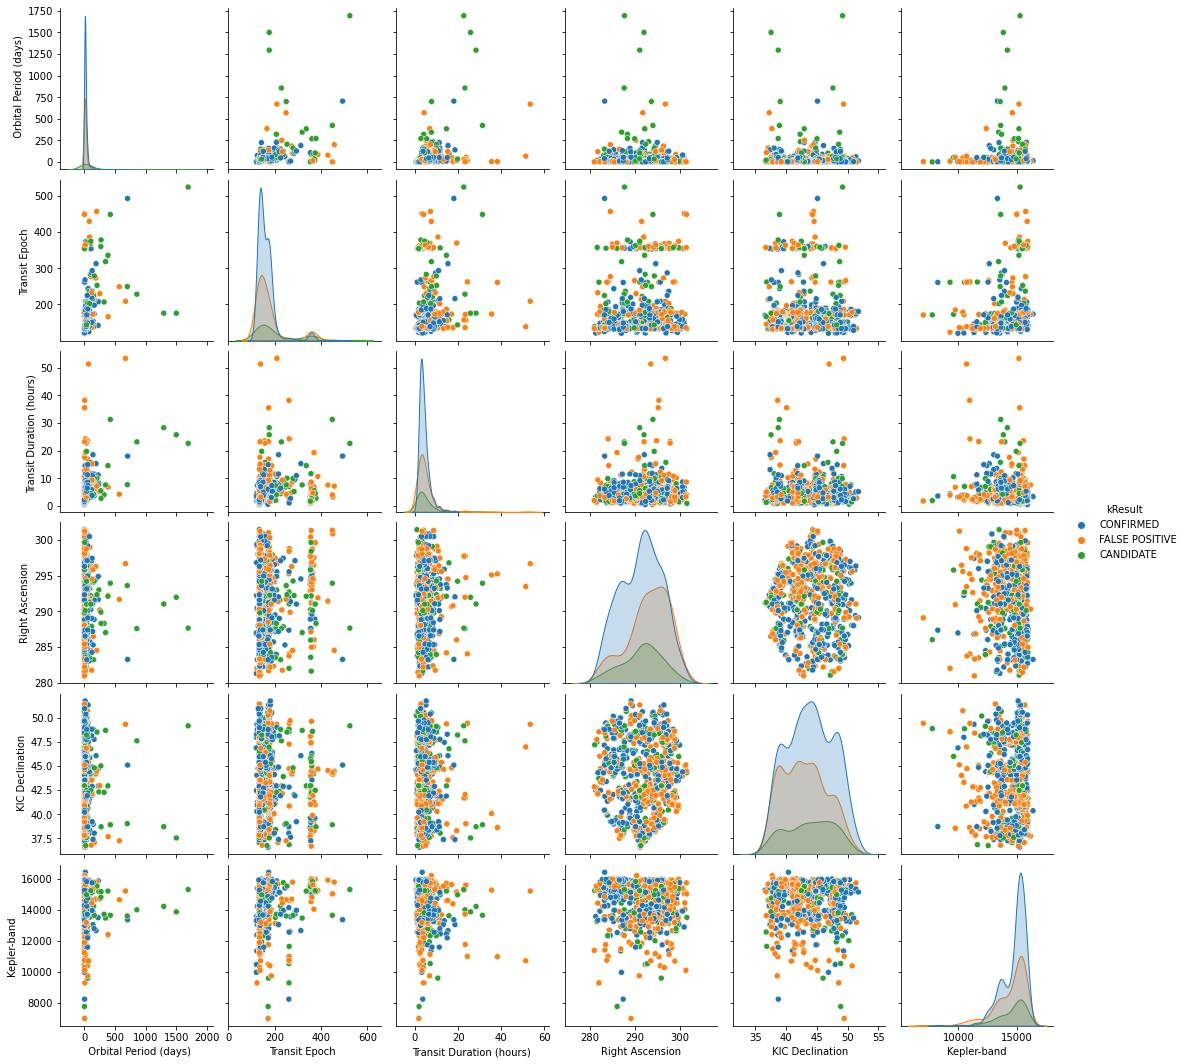

In [20]:
sns.pairplot(planetas.head(1000), vars = planetas.columns[8:14],hue = 'kResult')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
yPlanetas = planetas['kResult'].copy()
xPlanetas = planetas.drop(['kResult','kName','kID','Not Transit-Like Flag','Stellar Eclipse Flag','Centroid Offset Flag','Ephemeris Match Indicates Contamination Flag'],axis = 1)
xTreino, xTeste, yTreino, yTeste = train_test_split(xPlanetas, yPlanetas, test_size=0.80, random_state=3)

# Aqui criaremos 4 modelos com funções de kernel diferentes (parâmetro *kernel*) e treinaremos cada um deles com nossos dados de treino para no fim escolher o de precisão mais satisfatória.

In [9]:
modeloLinear = svm.SVC(kernel = 'linear')
modeloPoly = svm.SVC(kernel = 'poly')
modeloRBF = svm.SVC(kernel = 'rbf')
modeloSigmoid = svm.SVC(kernel = 'sigmoid')

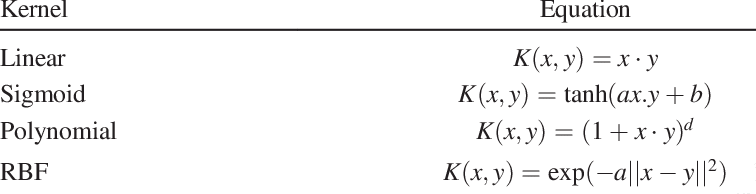

In [10]:
modeloLinear.fit(xTreino,yTreino)
modeloPoly.fit(xTreino,yTreino)
modeloRBF.fit(xTreino,yTreino)
modeloSigmoid.fit(xTreino,yTreino)

SVC(kernel='sigmoid')

# Aqui iremos mostrar o "score" de cada um dos nossos modelos, isto é, o quão preciso o modelo foi em relação à realidade, e os coeficientes da função de decisão.

* Perceba que os modelos Linear, Polinomial e RBF tiveram eficiência muito próxima, o que indica a complexidade do database. Portanto, para melhorar a precisão, teremos que manualmente testar os parâmetros (ou *coeficientes* ) de cada um dos modelos.

* Perceba também que a pontuação média de 60% indica que nosso modelo tem uma certa eficiência considerável, já o dobro da eficiência esperada para um modelo aleátorio (pontuação em torno de 30%). Isso demonstra que o truque de kernel é efetivo na manipulação de dados extremamente complexos como o utilizado. 

In [11]:
print(" Score = ",modeloLinear.score(xTeste,yTeste), "\n")
print(" Coeficientes da função de decisão: \n\n",modeloLinear.decision_function(xTeste))

 Score =  0.6286610878661087 

 Coeficientes da função de decisão: 

 [[-0.32922276  0.67367731  2.33072179]
 [-0.32894222  2.32686774  1.32018721]
 [ 1.2770612  -0.33235162  2.33233718]
 ...
 [-0.32927897  2.32649755  1.32365832]
 [-0.32911453  1.31526606  2.32791872]
 [-0.33015667  2.33049333  0.69147086]]


In [12]:
print(" Score = ",modeloPoly.score(xTeste,yTeste), "\n")
print(" Coeficientes da função de decisão: \n\n",modeloPoly.decision_function(xTeste))

 Score =  0.609571129707113 

 Coeficientes da função de decisão: 

 [[-0.18313152  0.98609739  2.18602058]
 [-0.19369086  2.13494475  1.13804114]
 [ 1.19654067 -0.27711675  2.25913841]
 ...
 [-0.21174068  2.1858835   1.10822033]
 [-0.18004629  1.02095104  2.17516812]
 [-0.20996554  1.1354542   2.16810562]]


In [13]:
print(" Score = ",modeloRBF.score(xTeste,yTeste), "\n")
print(" Coeficientes da função de decisão: \n\n",modeloRBF.decision_function(xTeste))

 Score =  0.6110094142259415 

 Coeficientes da função de decisão: 

 [[-0.17797152  0.95913473  2.18747069]
 [-0.19236241  2.10708391  1.1570834 ]
 [ 1.11634469 -0.25718876  2.24656074]
 ...
 [-0.2104117   2.17832977  1.11983146]
 [-0.17951131  0.99909434  2.17970445]
 [-0.20544084  2.13072314  1.16336594]]


In [14]:
print(" Score = ",modeloSigmoid.score(xTeste,yTeste), "\n")
print(" Coeficientes da função de decisão: \n\n",modeloSigmoid.decision_function(xTeste))

 Score =  0.5010460251046025 

 Coeficientes da função de decisão: 

 [[ 0.81933557 -0.24431296  2.26569038]
 [-0.19743269  2.22217393  0.88228737]
 [ 2.06122758 -0.17444461  1.15535531]
 ...
 [-0.21185122  2.16059007  1.14960189]
 [-0.18608687  0.98948277  2.18817593]
 [ 0.79995624 -0.28362208  2.29271369]]
